### Student Information
Name:

Student ID: 109062519

GitHub ID: willy142857

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

## Part 1

### 1.1 Load data

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [3]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

<AxesSubplot:title={'center':'word frequency for top 30 words in train dataset'}>

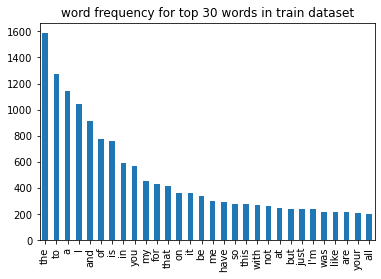

In [7]:
train_tokens = []
for t in train_df['text']:
    train_tokens.extend(t.split())

pd.Series(train_tokens).value_counts()[:30].plot(kind='bar', title='word frequency for top 30 words in train dataset')

<AxesSubplot:title={'center':'word frequency for top 30 words in test dataset'}>

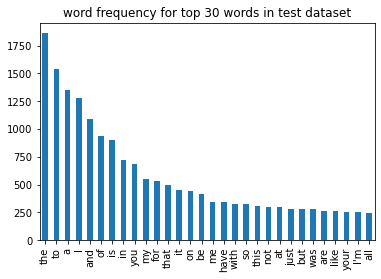

In [9]:
test_tokens = []
for t in test_df['text']:
    train_tokens.extend(t.split())

pd.Series(train_tokens).value_counts()[:30].plot(kind='bar', title='word frequency for top 30 words in test dataset')

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
train_tfidf = vectorizer.fit_transform(train_df.text)

vectorizer.get_feature_names()[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

From the confusion matrix, we can easily observe how our model performs on each class. The diagonal terms represent the number of correct predictions for each class, and the other terms either represent false positives or false negatives. For instance, out of all 'anger' tweets, 15 are predicted as 'fear', 5 are predicted as 'joy', 9 are predicted as sadness. Furthermore, we can use confusion matrix to evaluate the performance with different metrics.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [15]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

[nltk_data] Downloading package punkt to /home/pwyang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [22]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb_model = mnb.fit(X_train, y_train)

y_train_pred = mnb_model.predict(X_train)
y_test_pred = mnb_model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(classification_report(y_true=y_test, y_pred=y_test_pred))
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347

training accuracy: 0.79
testing accuracy: 0.69


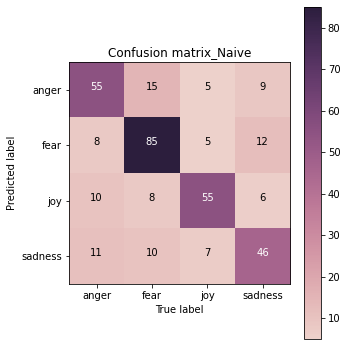

In [19]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()


m_cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(m_cm, classes=my_tags, title='Confusion matrix_Naive')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Decision tree performs much better than Naive Bayes on the training data, but Naive Bayes outperforms Decision tree on the testing data. In the test set, Naive Bayes performs slightly better than Decision tree on 'anger', 'joy', and 'sadness', and performs a lot better on 'fear'.

Decision tree models tend to overfit on the training data if not be pruned, so the testing accuracy is not good.

Naive bayes model performs a lot better on 'fear'. The reason for this could be that it learns the prior probabilities for each class while the Decision tree makes no assumptions on distribution of data. The occurrence of 'fear' is the highest in both training and testing data.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

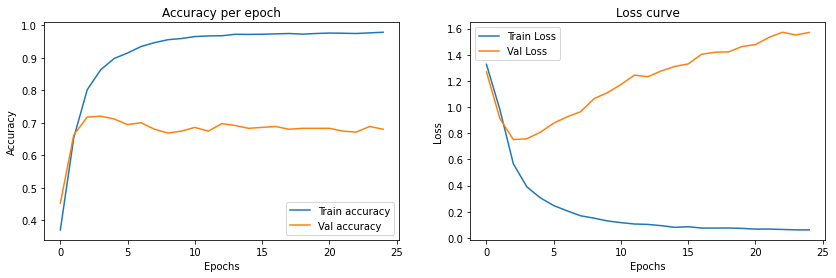

In [44]:
training_log = pd.read_csv('logs/training_log.csv')

plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title('Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_log.accuracy, label='Train accuracy')
plt.plot(training_log.val_accuracy, label='Val accuracy')
plt.legend()

plt.subplot(122)
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(training_log.loss, label='Train Loss')
plt.plot(training_log.val_loss, label='Val Loss')
plt.legend()

plt.show()

While the train accuracy almost reaches 1 after 5 epochs, val accuracy remains around 0.7. Val loss stops decreasing and starts increasing after few epochs while train loss keeps decreasing. This is the case of overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


We can sum the word vectors of each sentence to aquire a vector that represents the sentence. Or we can use attention mechanism to weighted sum the vectors to emphasis important words.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [4]:
from gensim.models import KeyedVectors

###################################################################################
## Note: this model is very huge, this will take some time ...
model_path = 'GoogleNews-vectors-negative300.bin.gz'
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')
###################################################################################

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]      
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

cn = topn + 1
color = ['b']*cn + ['g']*cn + ['r']*cn + ['y']*cn

load ok
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irrita

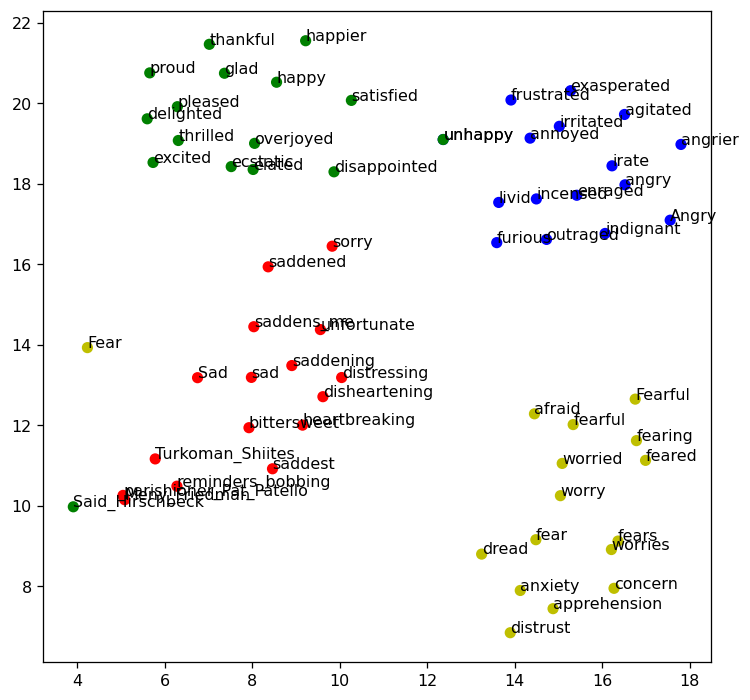

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
plt.show()

## Part 2

### 1. Data preparation

In [42]:
from pathlib import Path
import pandas as pd

dataset_dir = 'dm2020-hw2-nthu'
dataset_path = Path(dataset_dir)

In [43]:
tweets_df = pd.read_json(dataset_path / 'tweets_DM.json', lines=True)

tweets_df.head(1)

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets


In [44]:
print(tweets_df.iloc[0][2])

{'tweet': {'hashtags': ['Snapchat'], 'tweet_id': '0x376b20', 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}}


In [45]:
tweets_df['tweet_id'] = tweets_df['_source'].apply(lambda x: x['tweet']['tweet_id'])
tweets_df['hashtags'] = tweets_df['_source'].apply(lambda x: x['tweet']['hashtags'])
tweets_df['text'] = tweets_df['_source'].apply(lambda x: x['tweet']['text'])

tweets_df = tweets_df.drop(columns=['_source'])

In [47]:
identification_df = pd.read_csv(dataset_path / 'data_identification.csv')
emotion_df = pd.read_csv(dataset_path / 'emotion.csv')

temp_df = pd.merge(identification_df, emotion_df, how='left', on='tweet_id')
tweets_df = pd.merge(tweets_df, temp_df, how='left', on='tweet_id')

### Score the preprocessing data 

In [77]:
import pickle

train_df = tweets_df.query("identification == 'train'").reset_index()
test_df = tweets_df.query("identification == 'test'").reset_index()

pickle.dump(train_df, open(dataset_path/'train.pkl', 'wb'))
pickle.dump(test_df, open(dataset_path/'test.pkl', 'wb'))

### 2. Data analysis

#### Read the data

In [49]:
import pickle

train_df = pickle.load(open(dataset_path/'train.pkl', 'rb'))
test_df = pickle.load(open(dataset_path/'test.pkl', 'rb'))

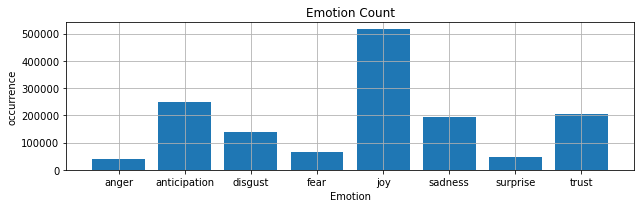

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']

fig, ax = plt.subplots(figsize=(9,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('occurrence')
plt.xlabel('Emotion')
plt.title('Emotion Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The dataset is unbalanced.

### 3. Model used for kaggle competition

### 3.1 Dense Model

#### Split data

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df['text'].values, train_df['emotion'].values, test_size=0.2)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1164450,)
y_train.shape:  (1164450,)
X_test.shape:  (291113,)
y_test.shape:  (291113,)


In [51]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

tfidf_vectorizer.fit(train_df['text'])

TfidfVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x7f5b8f883d40>)

In [52]:
X_train = tfidf_vectorizer.transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [53]:
import pickle

pickle.dump(X_train, open('x_train.pkl', 'wb'))
pickle.dump(y_train, open('y_train.pkl', 'wb'))

In [54]:
import keras
from sklearn.preprocessing import LabelEncoder
import numpy as np

# one-hot encoding
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('labels: ', label_encoder.classes_)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

labels:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']


#### Build the model
I use 4 dense layers.

In [57]:
from keras import Model, Sequential
from keras.layers import Input, Dense, Embedding, LSTM, Dropout, Embedding
from keras.layers import ReLU, Softmax


main_input = Input(shape=(X_train.shape[1],))
x = Dense(256)(main_input)
x = Dropout(0.2)(x)
x = Dense(128)(x)
x = Dropout(0.2)(x)
x = Dense(64)(x)
x = Dropout(0.2)(x)
x = Dense(8)(x)
main_output = Softmax()(x)
    
model = Model(inputs=[main_input], outputs=[main_output])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               128256    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

#### Train the model

In [58]:
batch_size = 1024
epochs = 5

In [63]:
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/train_log.csv')
callback = EarlyStopping(monitor='loss', patience=3)

history = model.fit(X_train.toarray(), y_train,
                   callbacks=[csv_logger, callback],
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(X_test.toarray(), y_test))

Epoch 1/5
1138/1138 [==============================] - 5s 4ms/step - loss: 1.5126 - accuracy: 0.4527 - val_loss: 1.4798 - val_accuracy: 0.4623
Epoch 2/5
1138/1138 [==============================] - 4s 4ms/step - loss: 1.4911 - accuracy: 0.4595 - val_loss: 1.4782 - val_accuracy: 0.4605
Epoch 3/5
1138/1138 [==============================] - 4s 4ms/step - loss: 1.4889 - accuracy: 0.4604 - val_loss: 1.4773 - val_accuracy: 0.4627
Epoch 4/5
1138/1138 [==============================] - 4s 4ms/step - loss: 1.4878 - accuracy: 0.4605 - val_loss: 1.4788 - val_accuracy: 0.4600
Epoch 5/5
1138/1138 [==============================] - 4s 4ms/step - loss: 1.4868 - accuracy: 0.4606 - val_loss: 1.4771 - val_accuracy: 0.4624


#### Predict

In [64]:
import numpy as np
y = tfidf_vectorizer.transform(test_df['text'])
predict_result = model.predict(y.toarray())

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

predict_result = label_decode(label_encoder, predict_result)

In [79]:
predict_df = pd.DataFrame(predict_result, columns=['emotion'])

submission_df = pd.concat([test_df['tweet_id'], predict_df['emotion']], axis=1)
submission_df.columns = ['id', 'emotion']
submission_df.to_csv('submission_base.csv',index=False)

The public score on kaggle is 0.38436, which is not good enough, so I try bert to get higher score.

### Bert model
Bert is a powerful pretrained model. However, it takes long time to train and the model size is large. To train the model on server, I write the python script to may the thing easier.

In [ ]:
# It may take lot of times
!python bert.py

The final score is 0.50913. It is much better than above.